## 1. Import libraries

In [1]:
import torch
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

from model import LeNet5, LeNet5Modern


## 2. Load the MNIST Dataset

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

In [3]:
train_dataset = datasets.MNIST(root="./data/", train=True, download=True, transform=transform)
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)

test_dataset = datasets.MNIST(root="./data/", train=False, download=True, transform=transform)
test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=True)

classes = train_dataset.classes

In [4]:
import torch
import matplotlib.pyplot as plt
from typing import List

def plot_3x3(dataloader: DataLoader, classes: List[str] = None):
    images, labels = next(iter(dataloader))
    
    _, axes = plt.subplots(3, 3, figsize=(4, 4))
    
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i].numpy().transpose((1, 2, 0)))
        ax.set_title(classes[labels[i].item()])
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()

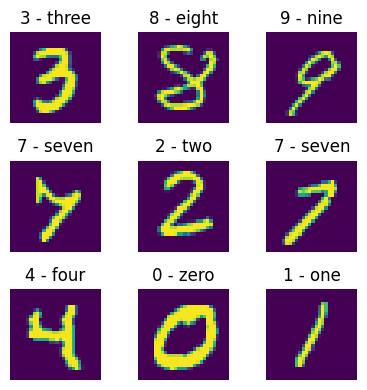

In [5]:
plot_3x3(train_dataloader, classes)

## 3. Initializing Model

In [6]:
model = LeNet5(num_classes=10)
model_modern = LeNet5Modern(in_channels=1, feature_channels=6, num_classes=10)

## 4. Setting up Hyperparameters

In [7]:
epochs = 10
lr = 1e-3
device = "cuda" if torch.cuda.is_available() else "cpu"
optimizer = torch.optim.SGD(model.parameters(), lr=lr)
optimizer_modern = torch.optim.SGD(model_modern.parameters(), lr=lr)

## 5. Training and Testing the Model

In [8]:
import matplotlib.pyplot as plt

def plot_loss_accuracy(
        train_losses: List[int], 
        test_losses: List[int], 
        train_accuracies: List[int], 
        test_accuracies: List[int]
    ) -> None:
    epochs = range(1, len(train_losses) + 1)

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, label="Training loss")
    plt.plot(epochs, test_losses, label="Testing loss")
    plt.title("Training and Testing Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracies, label="Training accuracy")
    plt.plot(epochs, test_accuracies, label="Testing accuracy")
    plt.title("Training and Testing Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.tight_layout()
    plt.show()

In [9]:
def calculate_accuracy(predicted, actual):
    return torch.eq(predicted.argmax(dim=1), actual).sum().item() / len(predicted)

In [10]:
def train(model, optimizer):
    model.to(device)
    train_losses, test_losses = [], []
    train_accuracies, test_accuracies = [], []
    for epoch in range(epochs):
        train_loss = 0
        train_acc = 0
        model.train()
        for X, y in train_dataloader:
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            loss = F.cross_entropy(y_pred, y)
            
            train_loss += loss.item()
            train_acc += calculate_accuracy(F.softmax(y_pred, dim=1), y)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        
        test_loss = 0
        test_acc = 0
        model.eval()
        with torch.inference_mode():
            for X, y in test_dataloader:
                X, y = X.to(device), y.to(device)
                y_pred = model(X)
                loss = F.cross_entropy(y_pred, y)

                test_loss += loss.item()
                test_acc += calculate_accuracy(F.softmax(y_pred, dim=1), y)
        
        train_loss /= len(train_dataloader)
        test_loss /= len(test_dataloader)
        train_acc /= len(train_dataloader)
        test_acc /= len(test_dataloader)

        train_losses.append(train_loss)
        test_losses.append(test_loss)
        train_accuracies.append(train_acc)
        test_accuracies.append(test_acc)
        
        print(f"Epoch: {epoch} | Train Loss: {train_loss:.2f} Train Accuracy: {train_acc*100:.2f} | Test Loss: {test_loss:.2f} Test Accuracy: {test_acc*100:.2f}")
    plot_loss_accuracy(train_losses, test_losses, train_accuracies, test_accuracies)

Epoch: 0 | Train Loss: 2.29 Train Accuracy: 21.30 | Test Loss: 2.26 Test Accuracy: 37.73
Epoch: 1 | Train Loss: 2.21 Train Accuracy: 49.18 | Test Loss: 2.14 Test Accuracy: 54.89
Epoch: 2 | Train Loss: 2.01 Train Accuracy: 54.81 | Test Loss: 1.84 Test Accuracy: 55.48
Epoch: 3 | Train Loss: 1.65 Train Accuracy: 58.39 | Test Loss: 1.44 Test Accuracy: 64.07
Epoch: 4 | Train Loss: 1.27 Train Accuracy: 68.82 | Test Loss: 1.10 Test Accuracy: 74.22
Epoch: 5 | Train Loss: 0.99 Train Accuracy: 76.64 | Test Loss: 0.87 Test Accuracy: 79.70
Epoch: 6 | Train Loss: 0.81 Train Accuracy: 80.61 | Test Loss: 0.73 Test Accuracy: 82.71
Epoch: 7 | Train Loss: 0.69 Train Accuracy: 83.05 | Test Loss: 0.63 Test Accuracy: 84.36
Epoch: 8 | Train Loss: 0.61 Train Accuracy: 84.69 | Test Loss: 0.57 Test Accuracy: 85.81
Epoch: 9 | Train Loss: 0.55 Train Accuracy: 85.87 | Test Loss: 0.52 Test Accuracy: 86.67


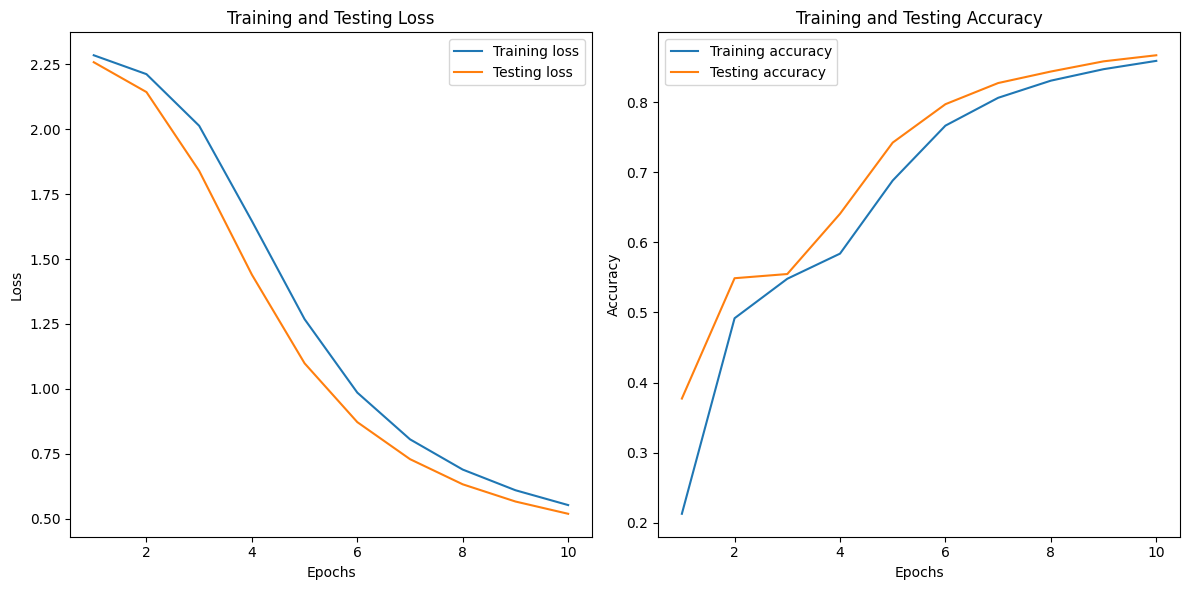

In [11]:
train(model, optimizer)

Epoch: 0 | Train Loss: 2.30 Train Accuracy: 14.77 | Test Loss: 2.27 Test Accuracy: 19.21
Epoch: 1 | Train Loss: 2.19 Train Accuracy: 31.47 | Test Loss: 2.03 Test Accuracy: 52.85
Epoch: 2 | Train Loss: 1.38 Train Accuracy: 67.37 | Test Loss: 0.79 Test Accuracy: 76.04
Epoch: 3 | Train Loss: 0.65 Train Accuracy: 80.22 | Test Loss: 0.53 Test Accuracy: 83.94
Epoch: 4 | Train Loss: 0.50 Train Accuracy: 85.03 | Test Loss: 0.44 Test Accuracy: 86.73
Epoch: 5 | Train Loss: 0.42 Train Accuracy: 87.33 | Test Loss: 0.39 Test Accuracy: 88.01
Epoch: 6 | Train Loss: 0.37 Train Accuracy: 88.74 | Test Loss: 0.34 Test Accuracy: 89.52
Epoch: 7 | Train Loss: 0.34 Train Accuracy: 89.87 | Test Loss: 0.31 Test Accuracy: 90.68
Epoch: 8 | Train Loss: 0.31 Train Accuracy: 90.69 | Test Loss: 0.30 Test Accuracy: 91.18
Epoch: 9 | Train Loss: 0.29 Train Accuracy: 91.33 | Test Loss: 0.27 Test Accuracy: 91.96


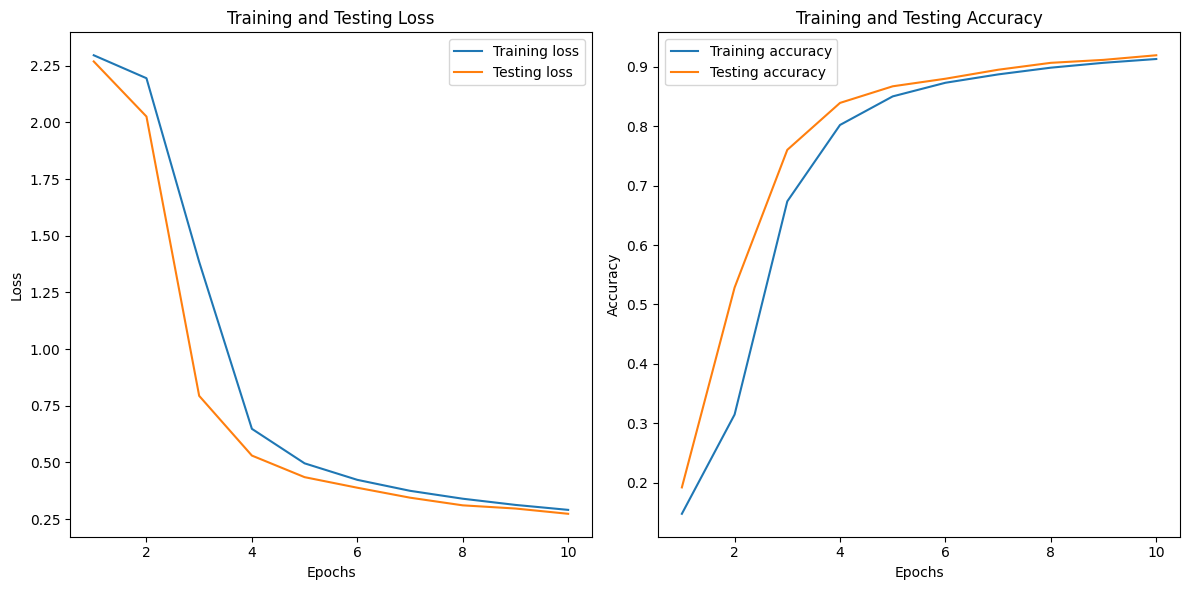

In [12]:
train(model_modern, optimizer_modern)